# First Ziegler-Nichols Method

See Section 10.3.2.

In [1]:
!pip install control > /dev/null

import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

## Define the transfer function

In [3]:
s = ctrl.TransferFunction.s
G = (0.1*s**2 + 0.1*s + 1) / (s+1)**2 / (0.2*s+1)**3 / (0.3*s + 1)
G

TransferFunction(array([0.1, 0.1, 1. ]), array([2.400e-03, 4.880e-02, 3.904e-01, 1.544e+00, 3.100e+00, 2.900e+00,
       1.000e+00]))

## Plot step response

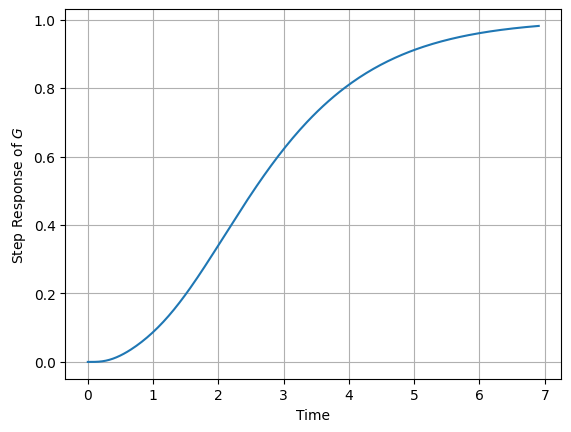

In [4]:
step_res = ctrl.step_response(G)
plt.plot(step_res.time, step_res.outputs)
plt.xlabel('Time')
plt.ylabel('Step Response of $G$')
plt.grid()
plt.show()

## Find the inflection point

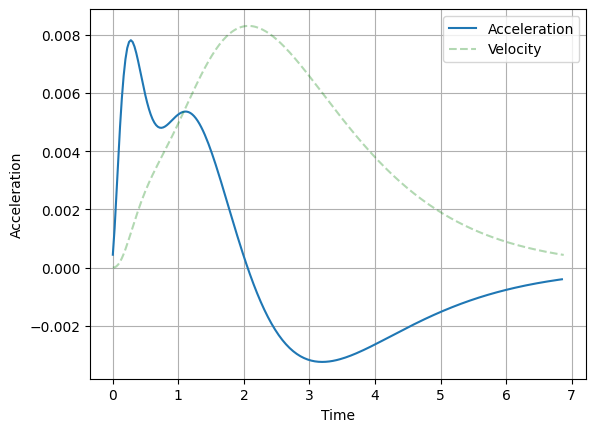

In [5]:
vel = np.diff(step_res.outputs, 1)
acc = np.diff(step_res.outputs, 2)


plt.plot(step_res.time[:-2], acc*40, label='Acceleration')
plt.plot(step_res.time[:-1], vel, 'g--', alpha=0.3, label='Velocity')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

In [6]:
# EXERCISE: write a Python script to determine the inflection point
#           and the following parameters
t_inflection = 2.064
vel_inflection = 0.30175
x_inflection = 0.36
L = 0.87095
T = 3.314
A = 1
R = A / T

## PID controller tuning (ZN1)

In [20]:
# Based on the tuning parameters in Section 10.3.2
Kc = 1.2 / (R * L)
tauI = 2*L
tauD = 0.5*L

## Simulations

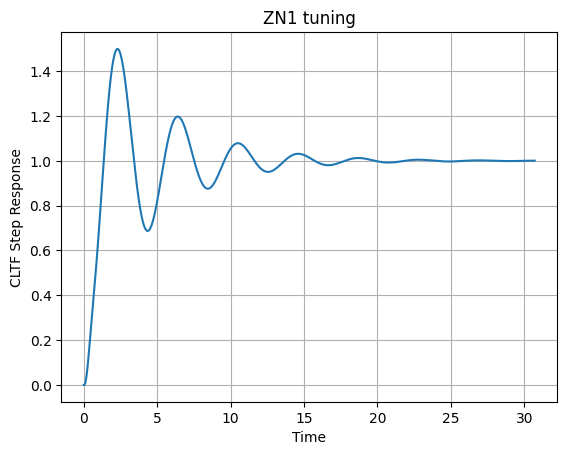

In [21]:
Gpid = Kc * (1 + tauD * s + 1 / (tauI * s))
Gcl = ctrl.feedback(ctrl.series(Gpid, G), 1)
step_res = ctrl.step_response(Gcl)
plt.plot(step_res.time, step_res.outputs)
plt.xlabel('Time')
plt.ylabel('CLTF Step Response')
plt.title('ZN1 tuning')
plt.grid()
plt.show()

In [10]:
overshoot = np.max(step_res.outputs) - 1
print(f'Overshoot = {overshoot*100:.1f}%')

Overshoot = 49.9%
